In [ ]:
#import library packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import train_test_split
#from lcp import plot_learning_curve
#from sklearn.cross_validation import KFold
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HIFDdataset.csv")

In [ ]:
data.shape

(11242, 13)

In [ ]:
df = data

In [ ]:
print (df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11242 entries, 0 to 11241
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BeneID                  11242 non-null  object
 1   ClaimID                 11242 non-null  object
 2   ClaimStartDt            11242 non-null  object
 3   ClaimEndDt              11242 non-null  object
 4   Provider                11242 non-null  object
 5   InscClaimAmtReimbursed  11242 non-null  int64 
 6   AttendingPhysician      11220 non-null  object
 7   OperatingPhysician      1921 non-null   object
 8   OtherPhysician          4204 non-null   object
 9   Procudure               6679 non-null   object
 10  Diagnosis               11061 non-null  object
 11  Output                  11242 non-null  int64 
 12  number_of_claims        11242 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB
None


(11242, 13)

In [ ]:
df.describe()

,InscClaimAmtReimbursed,Output,number_of_claims
count,11242.000000,11242.000000,11242.000000
mean,295.645793,0.279043,3.441025
std,1138.626611,0.448549,1.714717
min,0.000000,0.000000,1.000000
25%,40.000000,0.000000,2.000000
50%,80.000000,0.000000,3.000000
75%,200.000000,1.000000,5.000000
max,102500.000000,1.000000,6.000000


In [ ]:
df.columns 

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'Procudure', 'Diagnosis', 'Output',
       'number_of_claims'],
      dtype='object')

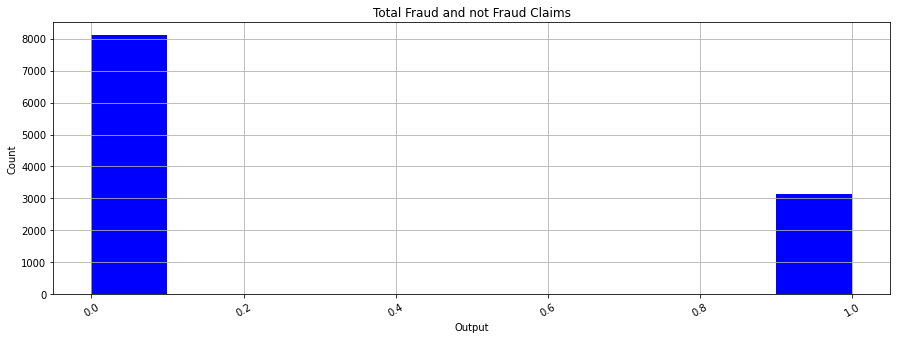

In [ ]:
#Histogram Plot of distribution
df["Output"].hist(figsize=(15,5), color="blue",xlabelsize=10,xrot=30.0)
plt.title("Total Fraud and not Fraud Claims")
plt.xlabel("Output")
plt.ylabel("Count")
plt.show()

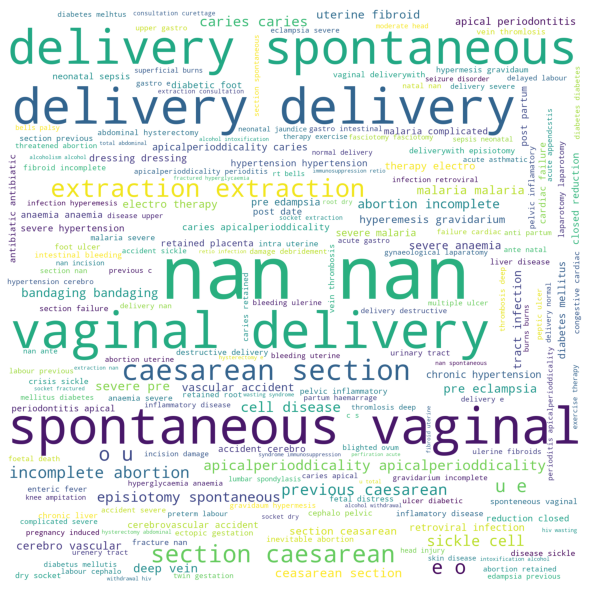

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
words_string = ''
stopwords = set(STOPWORDS)
ls=[]
ls.extend(df.Diagnosis)
ls.extend(df.Procudure)
for val in ls:
     
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
      if tokens[i] != "nan":
        tokens[i] = tokens[i].lower()
    words_string += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 2000, height = 2000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words_string)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

APICALPERIODDICALITY               0.17
CARIES                             0.16
CEREBRO VASCULAR ACCIDENT          0.04
CEREBROVASCULAR ACCIDENT           0.04
HYPERGLYCAEMIA                     0.04
                                   ... 
CELLULITIS R. LEG                  0.01
ABDOMIAL TRIRY 2 FRAUMA            0.01
UPPERGASTRO INTESTINAL BLEEDING    0.01
ORTHOSTATIC PNEUMONIA              0.01
SICKLE CELL DISEASE                0.01
Name: Diagnosis, Length: 79, dtype: float64

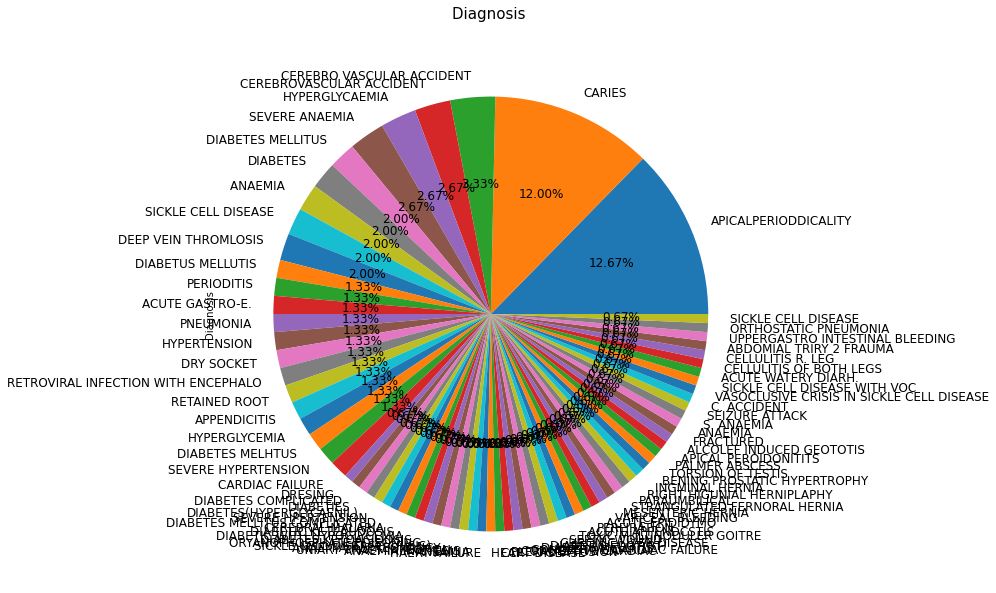

In [ ]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable][:150].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'Diagnosis')

In [ ]:
df.Diagnosis.unique()

array(['DIABETIC FOOT(RT)', 'ABDOMIAL TRIRY 2 FRAUMA',
       'TOXIC MULTINODULER GOITRE', 'ACUTE APPENDCSTIS', 'APPENDICITIS',
       'PERFIRATION', 'ACUTE EPIDIDYMO', 'VARICEAL BLEEDING',
       'MESENTERIC HERNIA', 'STRANGULATED FERNORAL HERNIA',
       'PARAUMBILICAL', 'RIGHT HIGUNIAL HERNIPLAPHY', 'INGMINAL HERNIA',
       'BENING PROSTATIC HYPERTROPHY', 'TORSION OF TESTIS',
       'PALMER ABSCESS', 'SEPTIC WOUND', 'APICALPERIODDICALITY', 'CARIES',
       'PERIODITIS', 'RETAINED ROOT', 'APICAL PEROIDONITITS',
       'DRY SOCKET', 'FRACTURED', 'HYPERGLYCAEMIA', 'ANAEMIA',
       'S. ANAEMIA', 'SEIZURE ATTACK', 'C. ACCIDENT',
       'VASOCLUSIVE CRISIS IN SICKLE CELL DISEASE',
       ' SICKLE CELL DISEASE WITH VOC', 'ACUTE WATERY DIARH.',
       'ACUTE GASTRO-E.', 'PNEUMONIA', 'CELLULITIS OF BOTH LEGS',
       'DEEP VEIN THROMLOSIS', 'RETROVIRAL INFECTION WITH ENCEPHALO',
       'CELLULITIS R. LEG', 'HYPERGLYCEMIA', 'CEREBROVASCULAR ACCIDENT',
       'SEVERE HYPERTENSION', 'SICKLE C

In [ ]:
df.AttendingPhysician.unique()

array(['PHY326117', 'PHY362868', 'PHY328821', ..., 'PHY386220',
       'PHY342936', 'PHY363131'], dtype=object)

In [ ]:
df.corr()

,InscClaimAmtReimbursed,Output,number_of_claims
InscClaimAmtReimbursed,1.000000,-0.01032,0.011668
Output,-0.010320,1.00000,-0.000520
number_of_claims,0.011668,-0.00052,1.000000


In [ ]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HIFDdataset.csv")

In [ ]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'Procudure', 'Diagnosis', 'Output',
       'number_of_claims'],
      dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [ ]:
del df['BeneID']
del df["ClaimID"]
del df["ClaimStartDt"]
del df["ClaimEndDt"]
del df["Provider"]
del df["InscClaimAmtReimbursed"]
del df['number_of_claims']


In [ ]:
df.columns

Index(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'Procudure', 'Diagnosis', 'Output'],
      dtype='object')

In [ ]:
df.shape

(11242, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'Procudure', 'Diagnosis', 'Output']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [ ]:
#drop used to leave the rows/columns axis=0 for index and 1 for columns
X = df.drop(labels='Output', axis=1)
#Response variable storing all labels
y = df.loc[:,'Output'] 

In [ ]:
print(X)

       AttendingPhysician  OperatingPhysician  OtherPhysician  Procudure  \
0                     836                1592            3060         34   
1                    2865                1592            3060         36   
2                     991                1592            3060         54   
3                    1282                1592            3060          5   
4                    5152                1592            3060         37   
...                   ...                 ...             ...        ...   
11237                4952                1592             217         46   
11238                4173                1592            3060          7   
11239                3847                1592            3060          7   
11240                1774                 414            2133          7   
11241                2879                1592            1338         10   

       Diagnosis  
0             95  
1              3  
2            310  
3          

In [ ]:
##We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
def graph(title,LR):
    import matplotlib.pyplot as plt
    data=[LR]
    alg=title
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Insurance claims",fontsize=15)
    plt.legend(b,data,fontsize=9)

In [ ]:
def plot_confusion_matrix(cm2, title, cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#**LOGISTIC REGRESSION CLASSIFIER**


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      2432
           1       0.40      0.07      0.13       941

    accuracy                           0.71      3373
   macro avg       0.56      0.52      0.48      3373
weighted avg       0.64      0.71      0.63      3373


Confusion Matrix result of Logistic Regression is:
 [[2327  105]
 [ 871   70]]

Sensitivity :  0.9568256578947368

Specificity :  0.07438894792773645

Cross validation test results of accuracy:
[0.70875945 0.71231659 0.71263345 0.71174377 0.71218861]

Accuracy result of Logistic Regression is: 71.15283740183457
Confusion matrix-Logistic Regression:
[[2327  105]
 [ 871   70]]


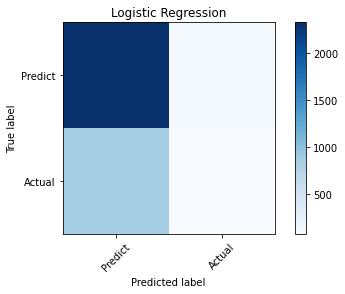

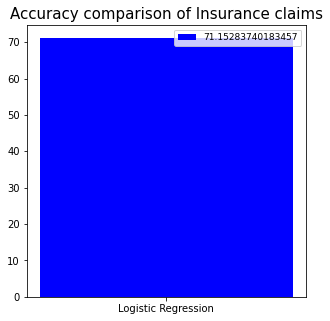

In [ ]:
logR= LogisticRegression()
logR.fit(X_train,y_train)
predictR = logR.predict(X_test)
print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictR))
print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")
accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-Logistic Regression:')
print(cm2)
plot_confusion_matrix(cm2,'Logistic Regression')
graph('Logistic Regression',LR)


# **RANDOM FOREST CLASSIFIER**


Classification report of Random Forest Classifier Results:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2432
           1       0.75      0.67      0.70       941

    accuracy                           0.84      3373
   macro avg       0.81      0.79      0.80      3373
weighted avg       0.84      0.84      0.84      3373


Confusion Matrix result of Random Forest Classifier is:
 [[2222  210]
 [ 315  626]]

Sensitivity :  0.9136513157894737

Specificity :  0.665249734325186

Cross validation test results of accuracy:
[0.84704313 0.85682526 0.84341637 0.85097865 0.84608541]

Accuracy result of Random Forest Classifier is: 84.88697625991148
Confusion matrix-Random Forest:
[[2222  210]
 [ 315  626]]


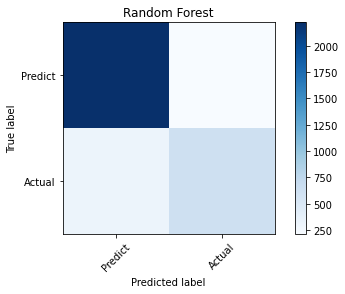

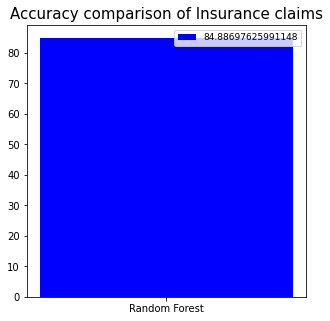

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)
print("")
print('Classification report of Random Forest Classifier Results:')
print("")
#print(metrics.classification_report(y_test, predictR))
print(classification_report(y_test,predictR))
print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest Classifier is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")
accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Random Forest Classifier is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-Random Forest:')
print(cm2)
plot_confusion_matrix(cm2,'Random Forest')
graph('Random Forest',LR)


# **DECISION TREE CLASSIFIER**


Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2432
           1       0.79      0.76      0.78       941

    accuracy                           0.88      3373
   macro avg       0.85      0.84      0.85      3373
weighted avg       0.88      0.88      0.88      3373


Confusion Matrix result of Decision Tree Classifier is:
 [[2244  188]
 [ 226  715]]

Sensitivity :  0.9226973684210527

Specificity :  0.7598299681190224

Cross validation test results of accuracy:
[0.87816807 0.879502   0.87900356 0.875      0.88078292]

Accuracy result of Decision Tree Classifier is: 87.84913104914956
Confusion matrix-Decision Tree:
[[2244  188]
 [ 226  715]]


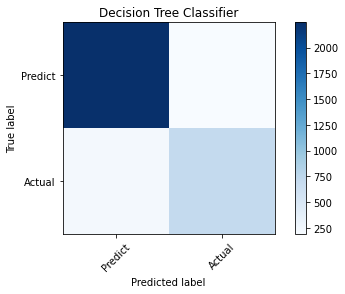

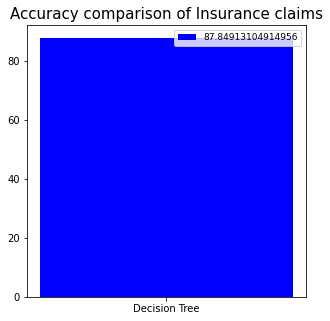

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictR = dtc.predict(X_test)
print("")
print('Classification report of Decision Tree Classifier Results:')
print("")
print(classification_report(y_test,predictR))
print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Decision Tree Classifier is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")
accuracy = cross_val_score(dtc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Decision Tree Classifier is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-Decision Tree:')
print(cm2)
plot_confusion_matrix(cm2,'Decision Tree Classifier')
graph('Decision Tree',LR)


# **NAIVE BAYES**


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      2432
           1       0.51      0.21      0.30       941

    accuracy                           0.72      3373
   macro avg       0.63      0.57      0.56      3373
weighted avg       0.68      0.72      0.68      3373


Confusion Matrix result of Naive Bayes is:
 [[2240  192]
 [ 742  199]]

Sensitivity :  0.9210526315789473

Specificity :  0.21147715196599362

Cross validation test results of accuracy:
[0.70831481 0.72165407 0.72019573 0.70418149 0.72108541]

Accuracy result of Naive Bayes is: 71.50863017015074
Confusion matrix-Naive Bayes:
[[2240  192]
 [ 742  199]]


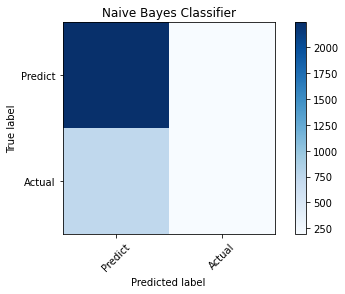

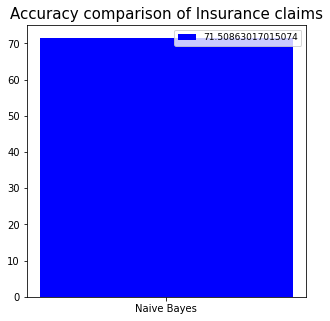

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
predictR = nb.predict(X_test)
print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictR))
print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")
accuracy = cross_val_score(nb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Naive Bayes is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-Naive Bayes:')
print(cm2)
plot_confusion_matrix(cm2,'Naive Bayes Classifier')
graph('Naive Bayes',LR)

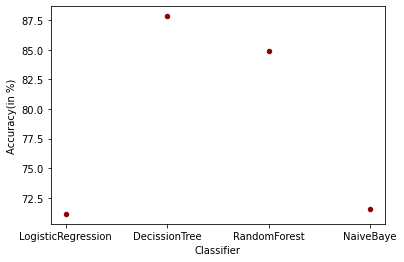

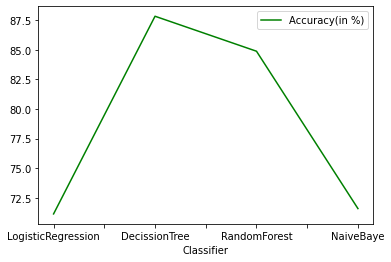

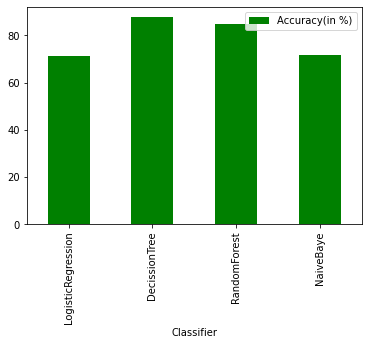

In [ ]:
results = pd.DataFrame({
    'Classifier': ['LogisticRegression', 'DecissionTree', 'RandomForest',"NaiveBaye"],
    'Accuracy(in %)': [71.15, 87.82, 84.87,71.60]
})
results.plot(x="Classifier", y="Accuracy(in %)", kind="scatter",color='darkred')
results.plot(x="Classifier", y="Accuracy(in %)", kind="line",color='green')
results.plot(x="Classifier", y="Accuracy(in %)", kind="bar",color='green')


# **Founded Decision tree as best classifier and passing test data**

In [ ]:
#!pip install colorama
def detectFraud(test):
  clone=test.copy()
  from colorama import Fore, Back, Style
  from sklearn.preprocessing import LabelEncoder
  var_mod = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician','Procudure', 'Diagnosis']
  le = LabelEncoder()
  for i in var_mod:
    test[i] = le.fit_transform(test[i]).astype(int)
  predictR=dtc.predict(test)
  for i in range(len(predictR)):
    if predictR[i] == 1:
      for j in var_mod:
        print(Fore.BLUE + str(clone[j][i]),end=" ")
      print(Fore.RED + '              (Data in row',i,'is','Fraudlent)')
    


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testHIFD.csv')
del test['BeneID']
del test["ClaimID"]
del test["ClaimStartDt"]
del test["ClaimEndDt"]
del test["Provider"]
del test["InscClaimAmtReimbursed"]
print(test.shape)

detectFraud(test)

(24, 5)
PHY372623 nan nan DEBRIDEMRNT SEPTIC WOUND               (Data in row 6 is Fraudlent)
PHY381511 nan PHY358876 HERMORRHAPHY STRANGULATED FERNORAL HERNIA               (Data in row 9 is Fraudlent)
PHY396851 nan nan HERMORRHAPHY PARAUMBILICAL               (Data in row 10 is Fraudlent)
PHY394597 nan PHY394597 HERNMORRAPHY RIGHT HIGUNIAL HERNIPLAPHY               (Data in row 11 is Fraudlent)
PHY372623 nan nan INCISUN AND DRIANAGE PALMER ABSCESS               (Data in row 13 is Fraudlent)
PHY372623 nan nan DEBRIDEMRNT SEPTIC WOUND               (Data in row 14 is Fraudlent)
